In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
df = pd.read_csv('BLD-LGC PTGBX 26 JUL21-8FEB23_edited.csv')
df.head()

Timestamp  PT N2 'C' Speed  Gear High Speed Drive End X Vibr  \
0  7/26/2021 5:45      5128.723145                          0.296389   
1  7/26/2021 5:50      5130.262207                          0.294855   
2  7/26/2021 5:55      5121.144531                          0.301340   
3  7/26/2021 6:00      5084.938965                          0.308058   
4  7/26/2021 6:05      5090.241699                          0.313758   

   Gear High Speed Drive End Y Vibr  Gear High Speed Non-Drive End X Vibr  \
0                          0.413373                              0.324846   
1                          0.405914                              0.325042   
2                          0.405914                              0.325830   
3                          0.412083                              0.325131   
4                          0.430409                              0.322932   

   Gear High Speed Non-Drive End Y Vibr  Gear LS Shaft Axial Displ 1  \
0                              0.491988                    10.041477   
1                              0.491340                    10.247612   
2                              0.488259                    10.378461   
3                              0.495821                    10.512401   
4                              0.492476                    10.477362   

   Gear LS Shaft Axial Displ 2  Gear Low Speed Drive End X Vibr  \
0                    10.557626                         0.379022   
1                    10.784430                         0.377899   
2                    10.921785                         0.378085   
3                    11.064705                         0.373516   
4                    11.035732                         0.378831   

   Gear Low Speed DriveEnd Y Vibr  ...  Gear LS Drive End Jrnl Brg Temp  \
0                        0.364291  ...                       196.280426   
1                        0.370086  ...                       196.279938   
2                        0.366067  ...                       197.281021   
3                        0.360375  ...                       197.281509   
4                        0.362193  ...                       197.281021   

   Gear LS Inboard Thrust Brg Temp  LO Supply Press  LO Cooler Outlet Temp  \
0                       127.332596        22.722622             106.153740   
1                       128.343506        22.721077             107.099617   
2                       128.869064        22.755575             108.105850   
3                       129.344574        22.786861             109.097611   
4                       129.344574        22.748289             109.106941   

   Pt Thrust Brg Temp  Pt Coupling End Temp  Pt Disch End Temp  \
0          139.316666            175.296387         188.311005   
1          140.253220            175.291733         188.305359   
2          141.249649            175.291733         188.305847   
3          141.249649            175.296387         186.298523   
4          141.249649            175.296387         186.323547   

   PT Rim Cooling 1&2 Temp  PT Rim Cooling 3&4 Temp  \
0               779.865906               780.616089   
1               786.046692               786.820435   
2               788.598450               789.264954   
3               789.723938               790.908203   
4               787.269226               788.036560   

   Gear LS Non-Drive End Jrnl Brg Temp  
0                           194.377380  
1                           195.333084  
2                           196.334168  
3                           196.329010  
4                           195.362763  

[5 rows x 32 columns]

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161788 entries, 0 to 161787
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Timestamp                              161788 non-null  datetime64[ns]
 1   PT N2 'C' Speed                        161788 non-null  float64       
 2   Gear High Speed Drive End X Vibr       161788 non-null  float64       
 3   Gear High Speed Drive End Y Vibr       161788 non-null  float64       
 4   Gear High Speed Non-Drive End X Vibr   161788 non-null  float64       
 5   Gear High Speed Non-Drive End Y Vibr   161788 non-null  float64       
 6   Gear LS Shaft Axial Displ 1            161788 non-null  float64       
 7   Gear LS Shaft Axial Displ 2            161788 non-null  float64       
 8   Gear Low Speed Drive End X Vibr        161788 non-null  float64       
 9   Gear Low Speed DriveEnd Y Vibr         161788 no

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

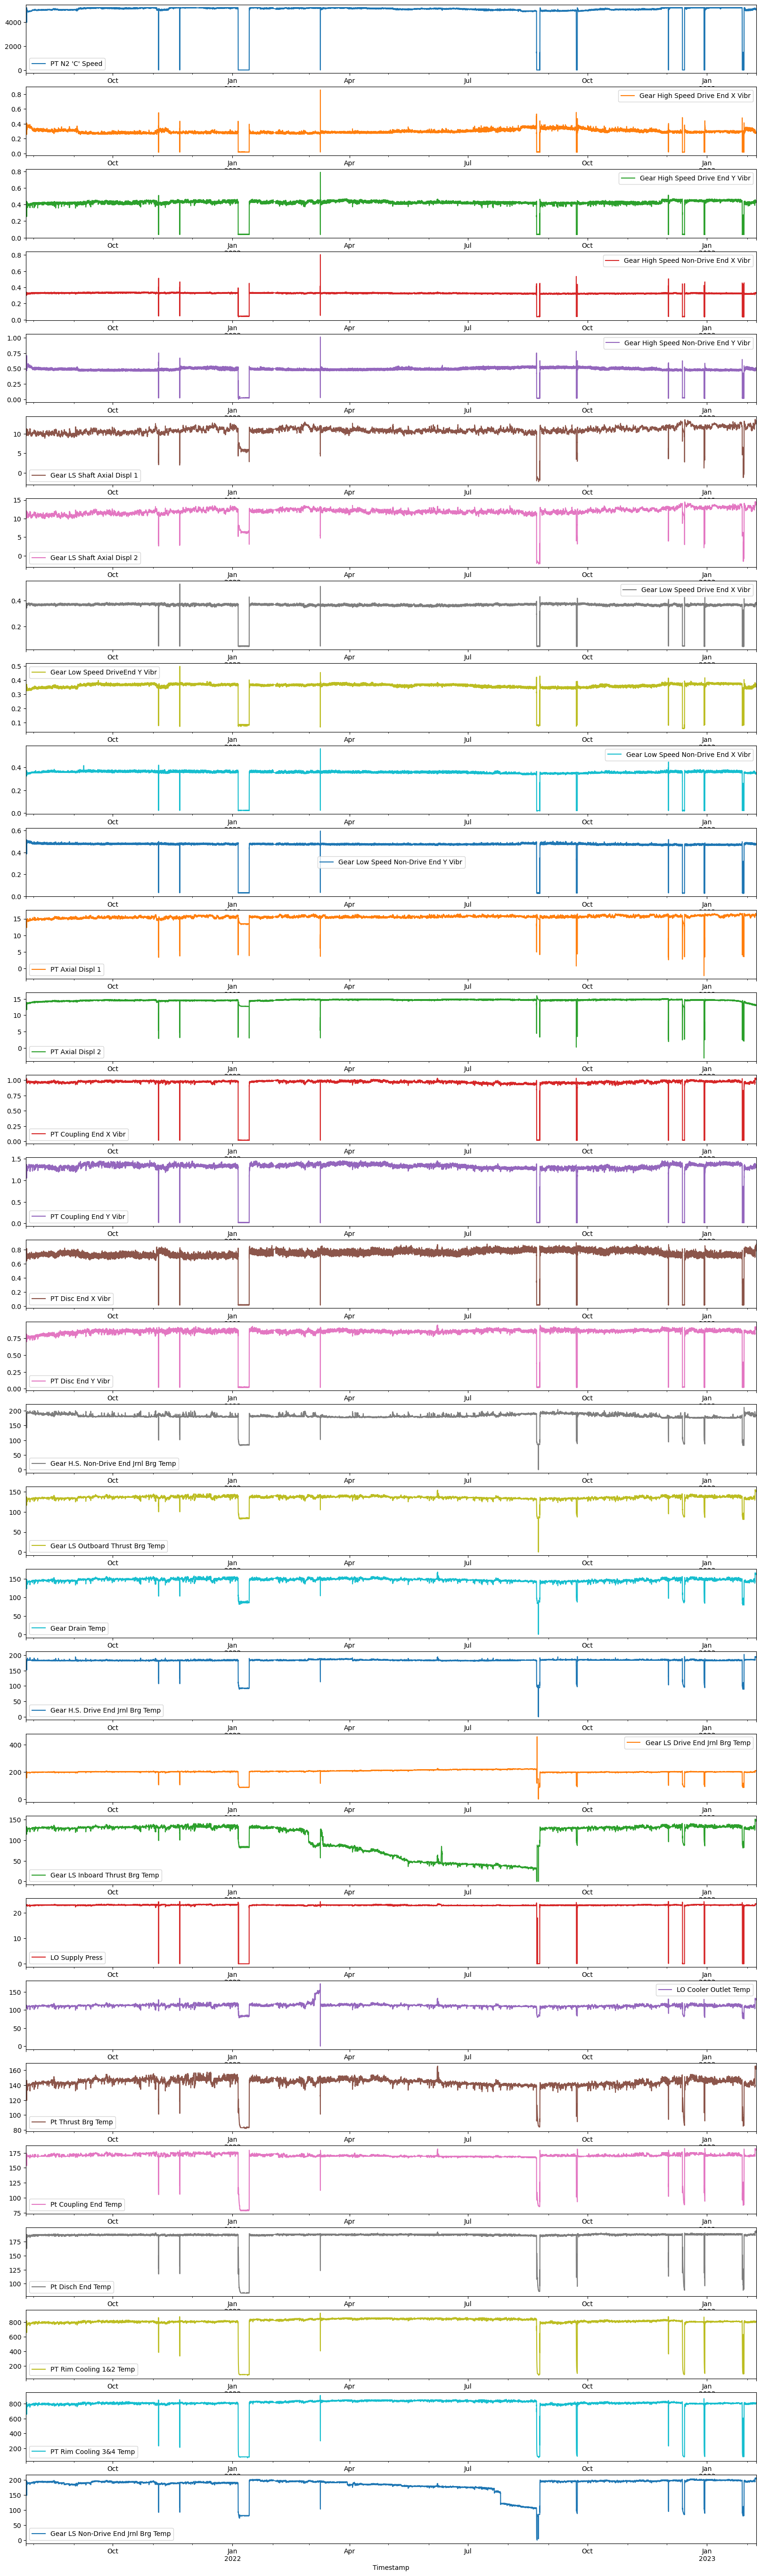

In [5]:
df.plot(x='Timestamp', subplots=True, sharex=False, figsize=(20,70))

<Axes: >

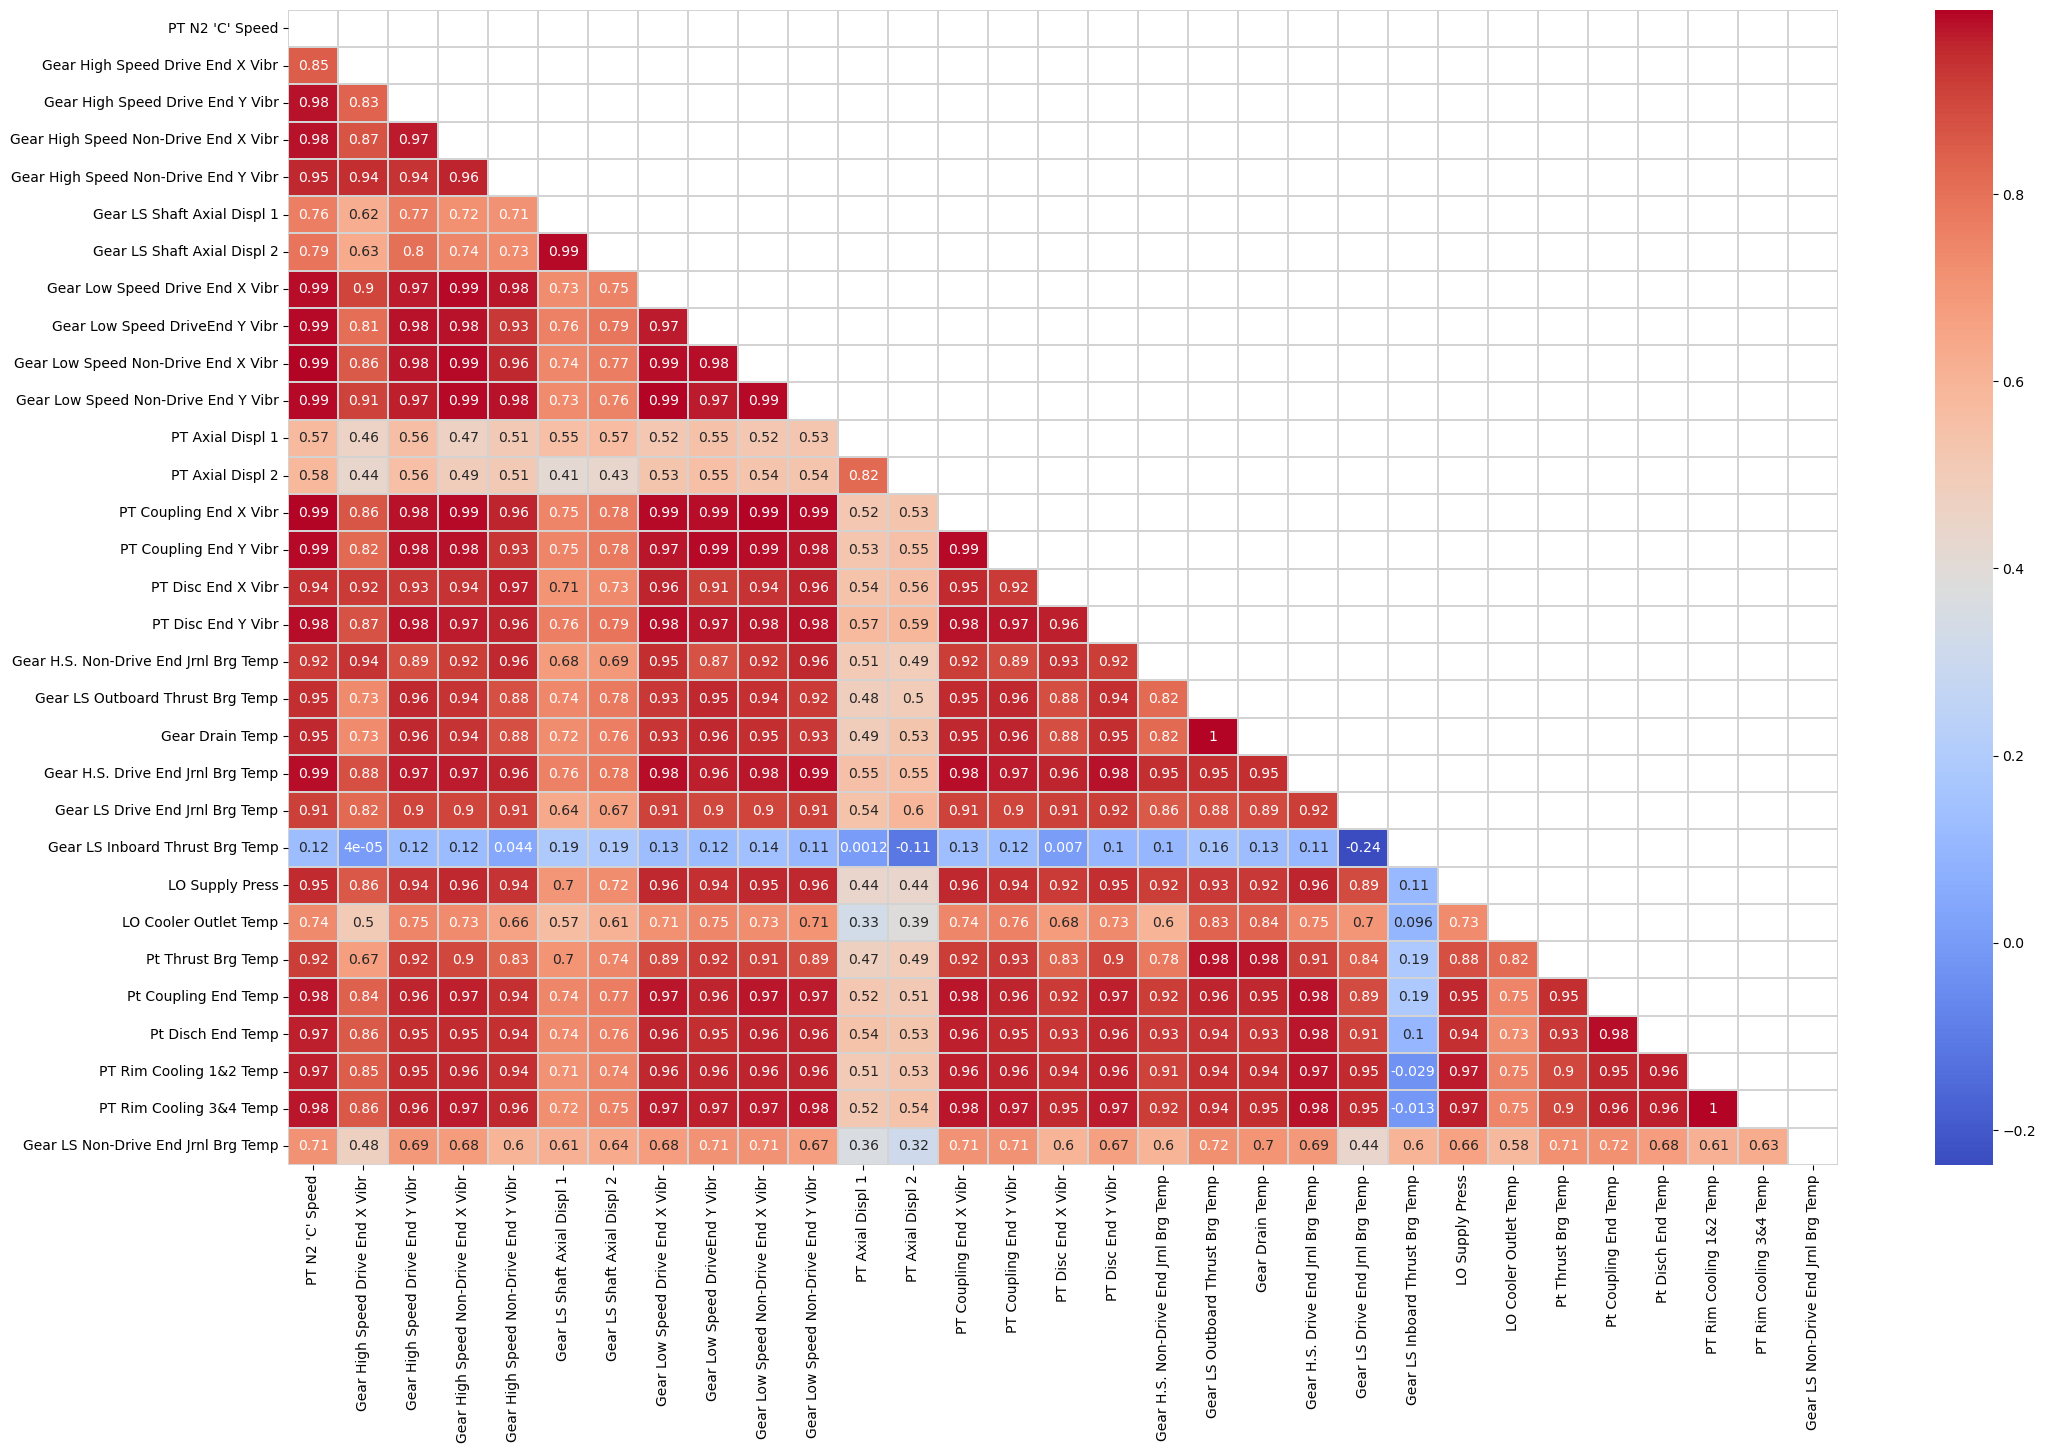

In [6]:
df_corr = df.drop('Timestamp', axis=1).corr()
plt.figure(figsize=(25,15))
mask = np.triu(df_corr)
sns.heatmap(data=df_corr, cmap='coolwarm', annot=True, mask=mask, linecolor='lightgrey', linewidths=.1)

In [7]:
# Helper function for selecting data easier
def data_selector(data, features, time_range_low=None, time_range_high=None):
    if time_range_low != None and time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low) & (data['Timestamp'] <= time_range_high)]
    elif time_range_low != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low)]
    elif time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] <= time_range_low)]
    data_selected = data_selected_time[features]
    return data_selected

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

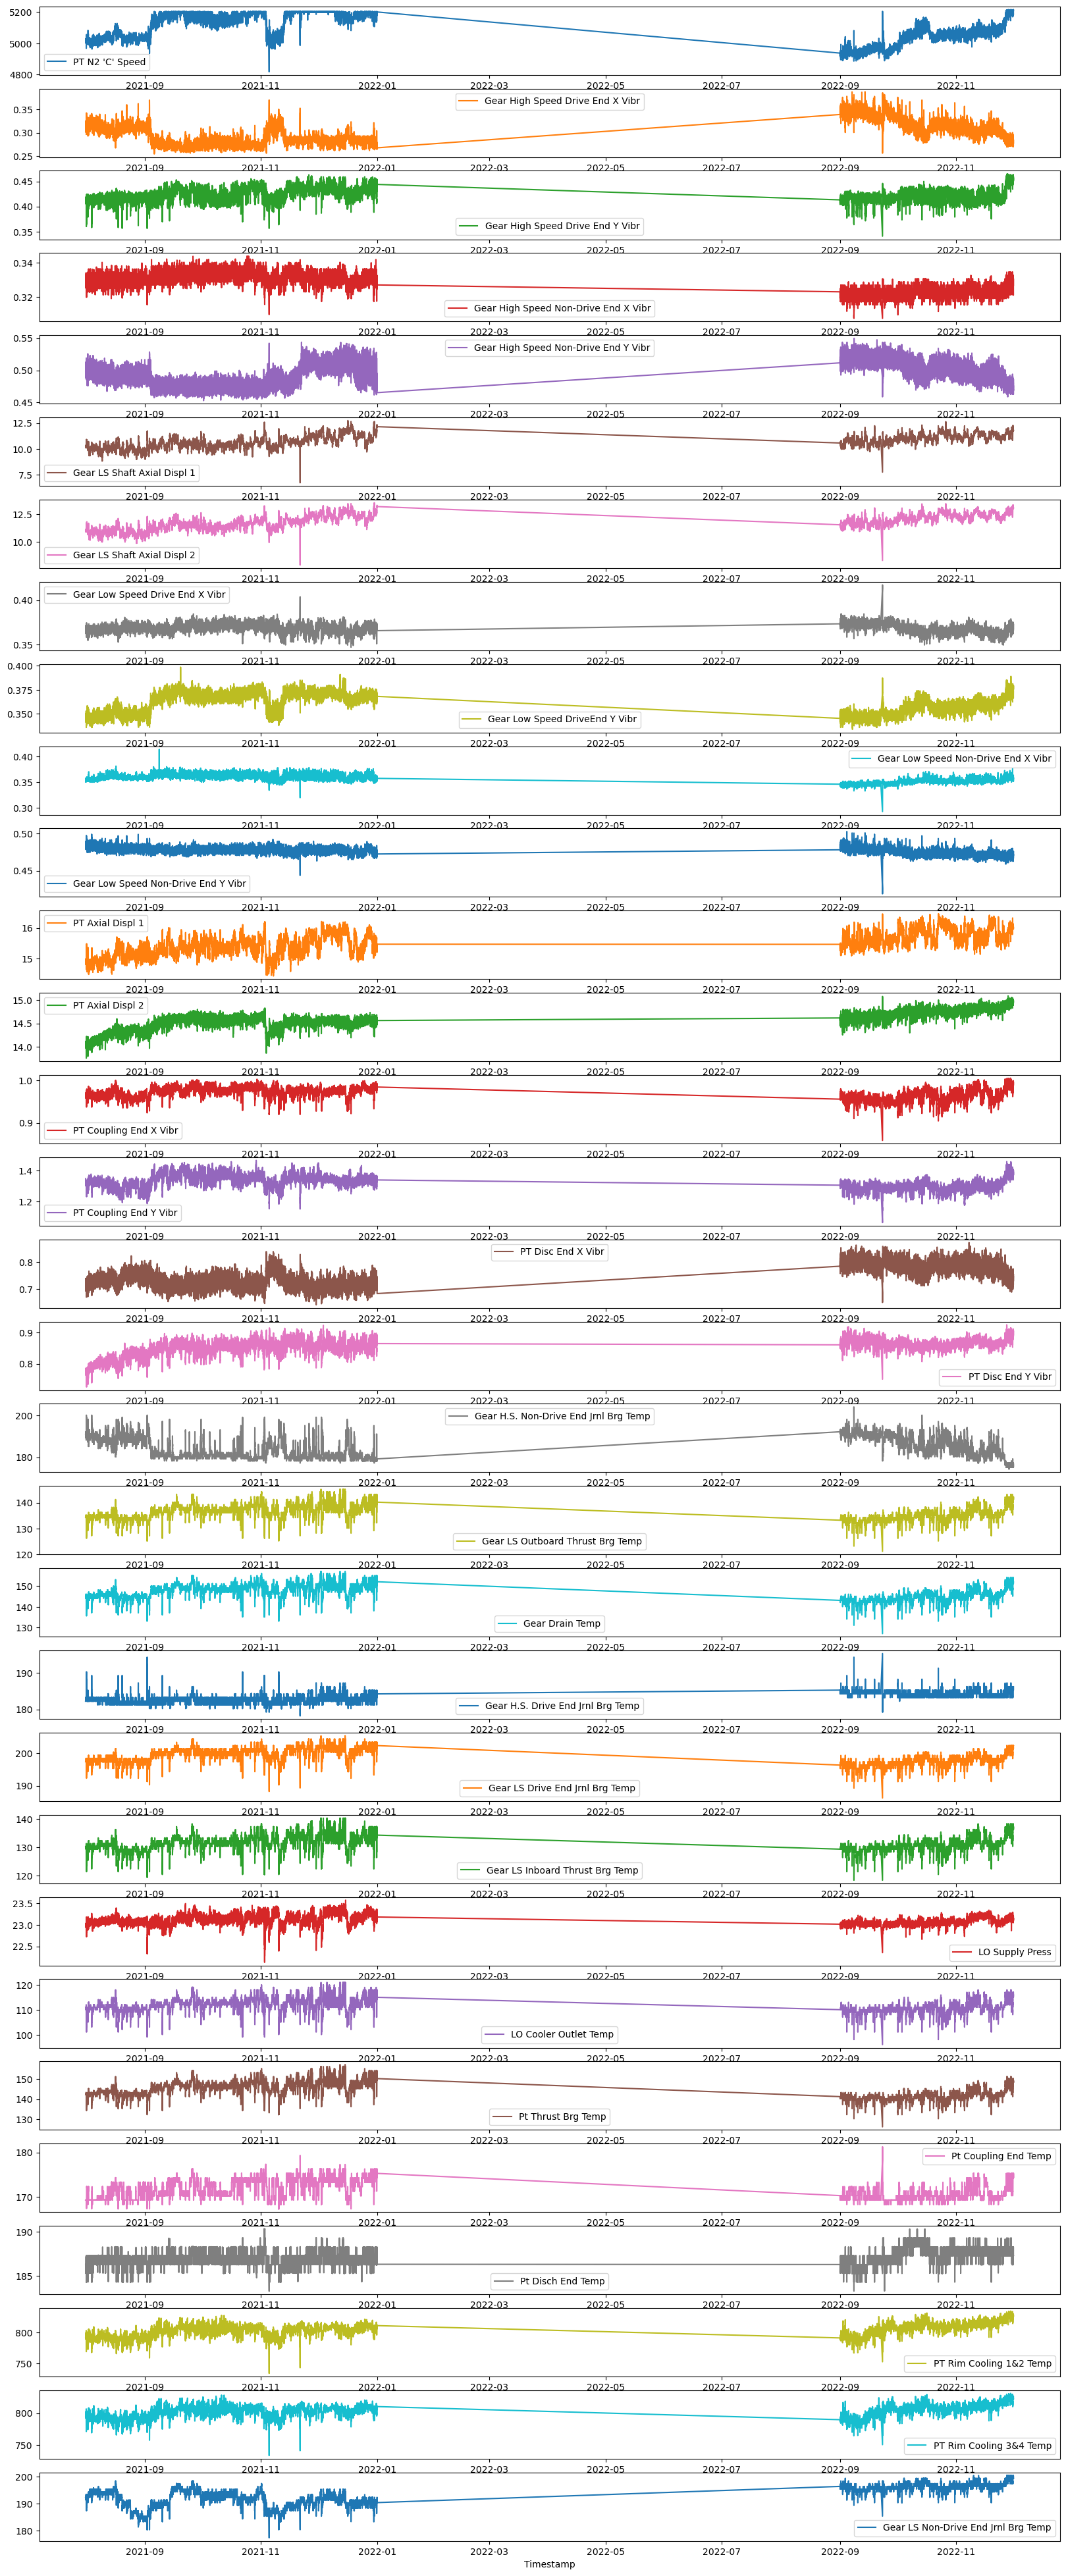

In [8]:
data_selected = data_selector(df, df.columns, '2021-08-01 00:00:00','2021-12-31 23:59:59')
data_selected = pd.concat([data_selected, data_selector(df, df.columns, '2022-09-01 00:00:00','2022-11-30 23:59:59')], ignore_index=True)

features = data_selected.drop('Timestamp', axis=1).columns.to_list()

PT_N2_C_Speed_IQR = data_selected['PT N2 \'C\' Speed'].quantile(0.75) - data_selected['PT N2 \'C\' Speed'].quantile(0.25)
PT_N2_C_Speed_upper = data_selected['PT N2 \'C\' Speed'].quantile(0.75) + 1.5 * PT_N2_C_Speed_IQR
PT_N2_C_Speed_lower = data_selected['PT N2 \'C\' Speed'].quantile(0.25) - 1.5 * PT_N2_C_Speed_IQR

data_selected = data_selected[
    (data_selected['PT N2 \'C\' Speed'] < PT_N2_C_Speed_upper) & 
    (data_selected['PT N2 \'C\' Speed'] > PT_N2_C_Speed_lower)]

data_selected.plot(x='Timestamp',sharex=False, subplots=True, figsize=(20,50))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

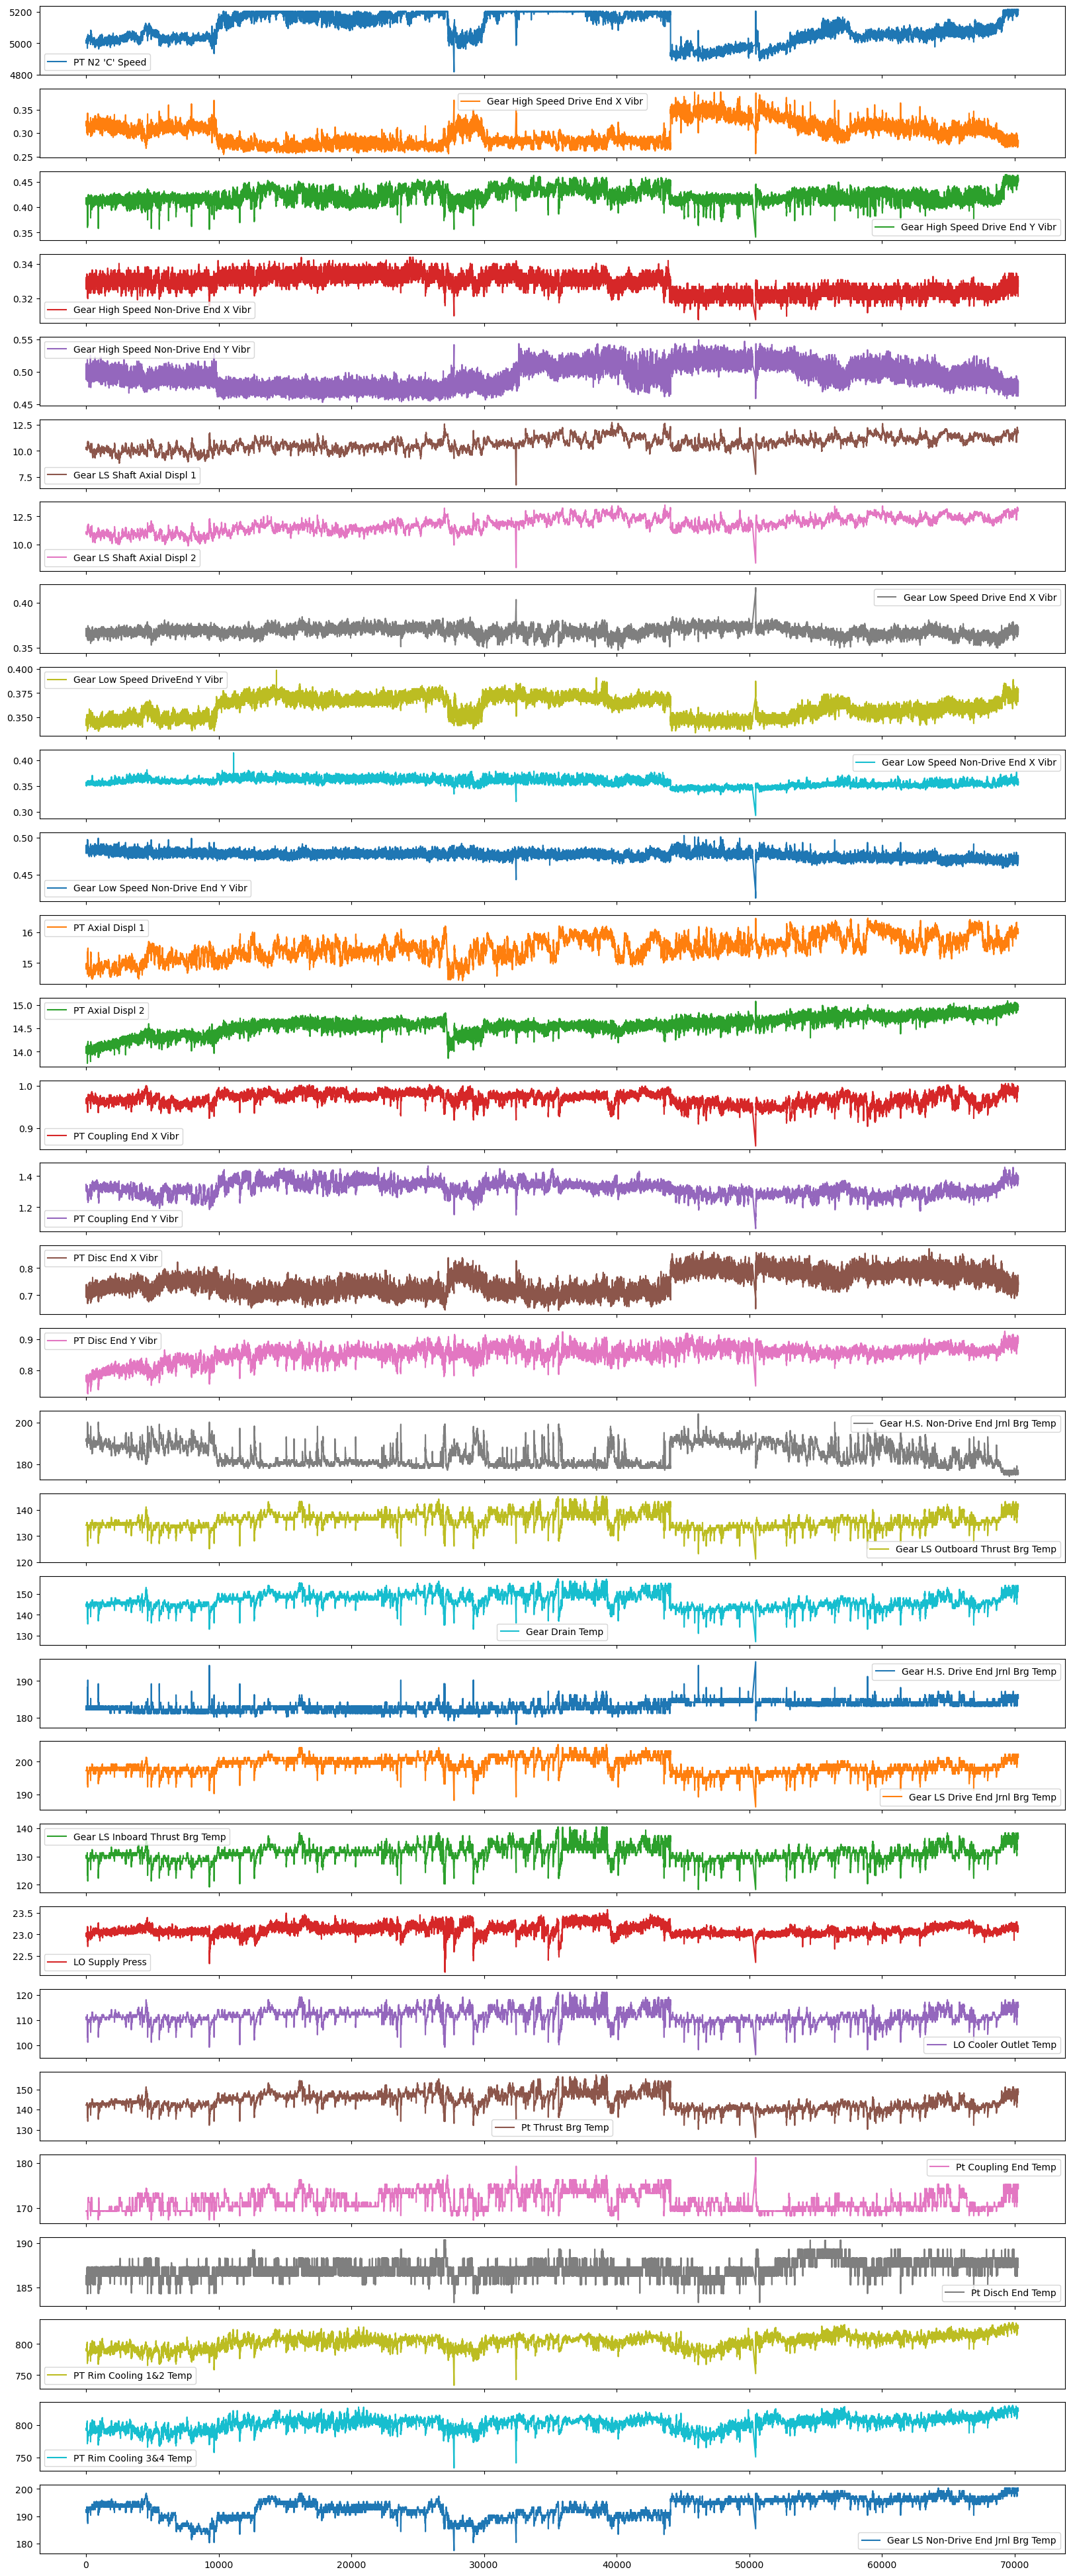

In [9]:
data_selected.drop('Timestamp', axis=1).plot(subplots=True, figsize=(20,50))

In [10]:
data_selected.values.shape

(69928, 32)

In [11]:
from sklearn.ensemble import IsolationForest

outlier_remove = IsolationForest(contamination=0.08)
outlier_remove.fit(data_selected.drop(['Timestamp','PT N2 \'C\' Speed'], axis=1).values)
data_selected['outlier'] = pd.Series(outlier_remove.predict(
    data_selected.drop(['Timestamp','PT N2 \'C\' Speed'],axis=1).values))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

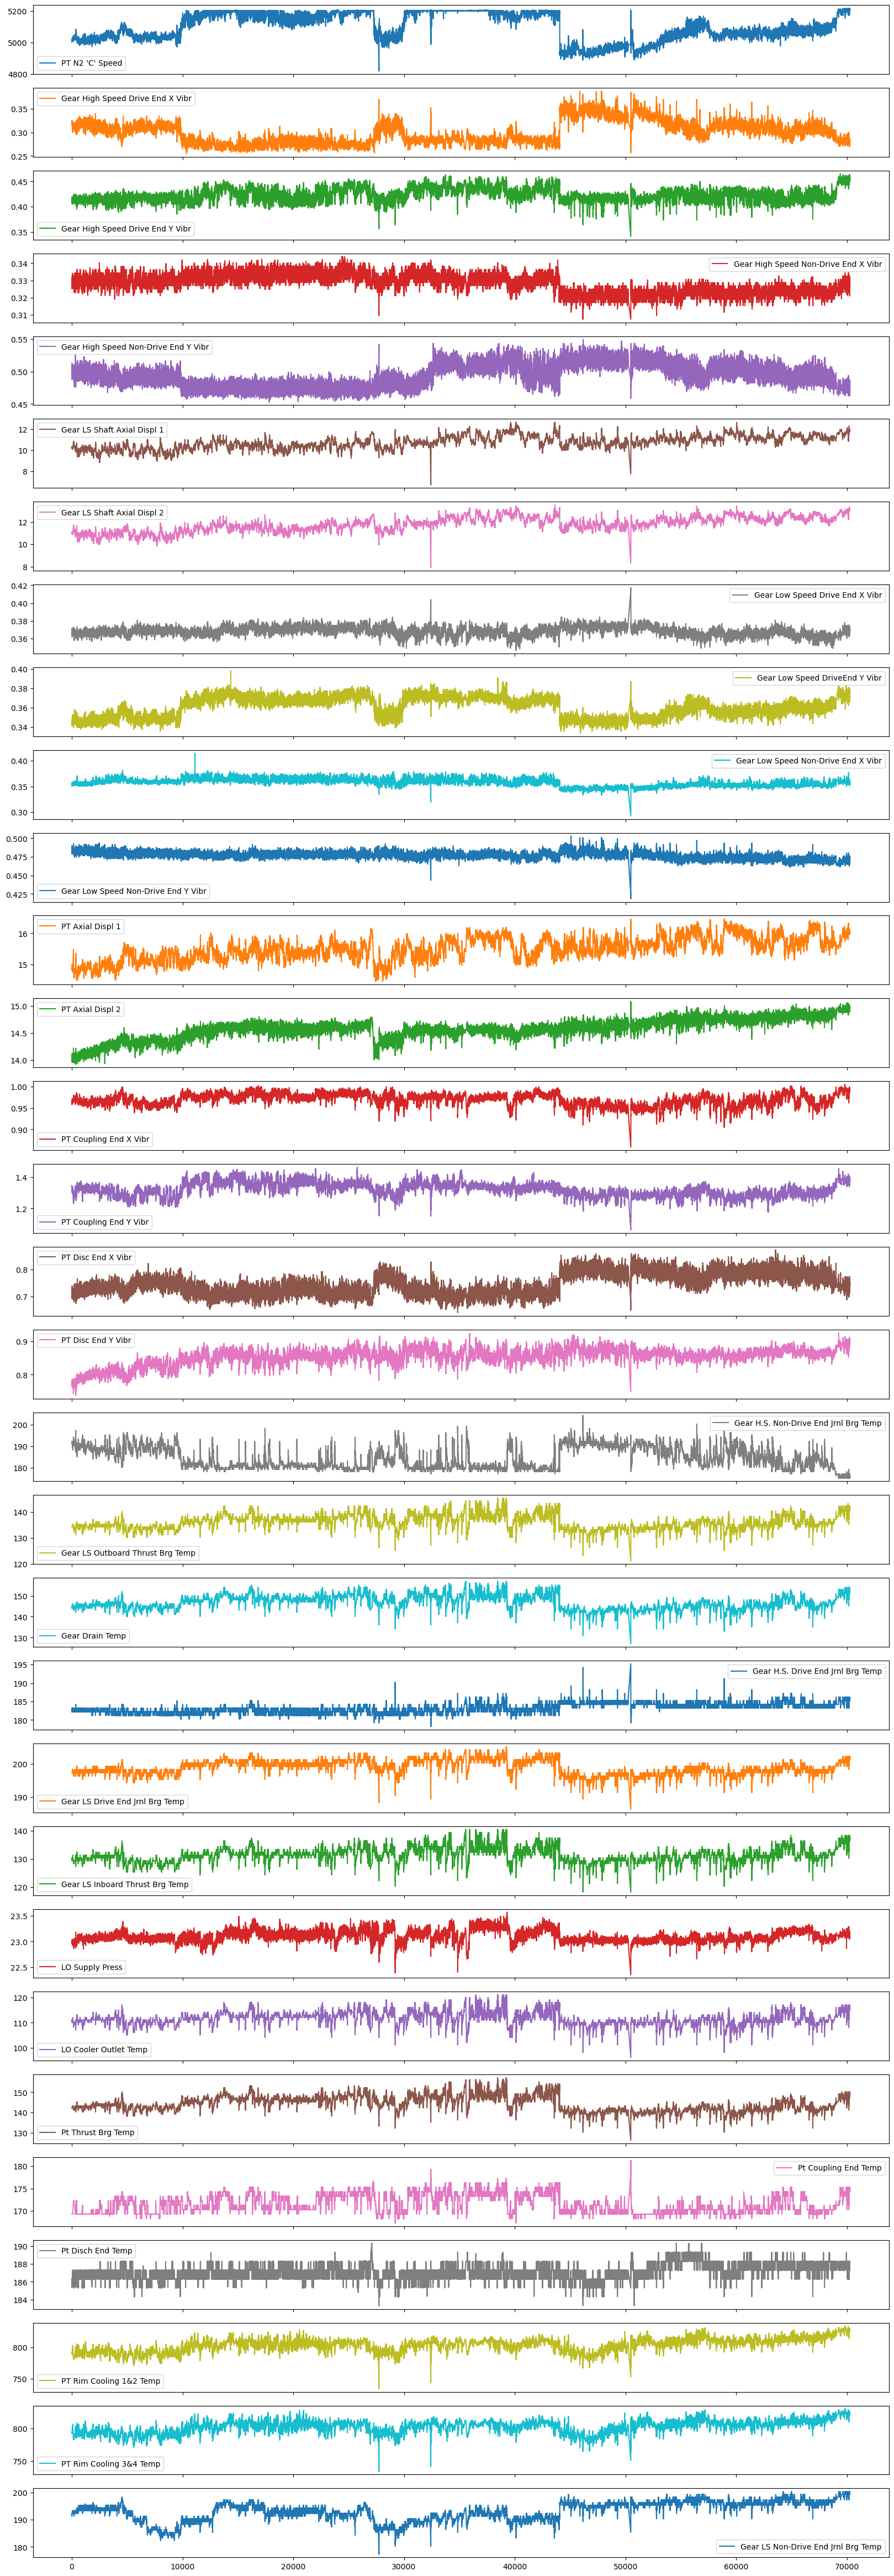

In [12]:
data_selected.drop((data_selected[data_selected['outlier'] == -1]).index, inplace=True)
data_selected.drop('outlier', axis=1, inplace=True)
data_selected.drop('Timestamp',axis=1).plot(subplots=True, figsize=(20,60))

In [13]:
data_selected.values.shape

(64381, 32)

In [14]:
data_selected.to_csv('train_data.csv', index=False)

<Axes: >

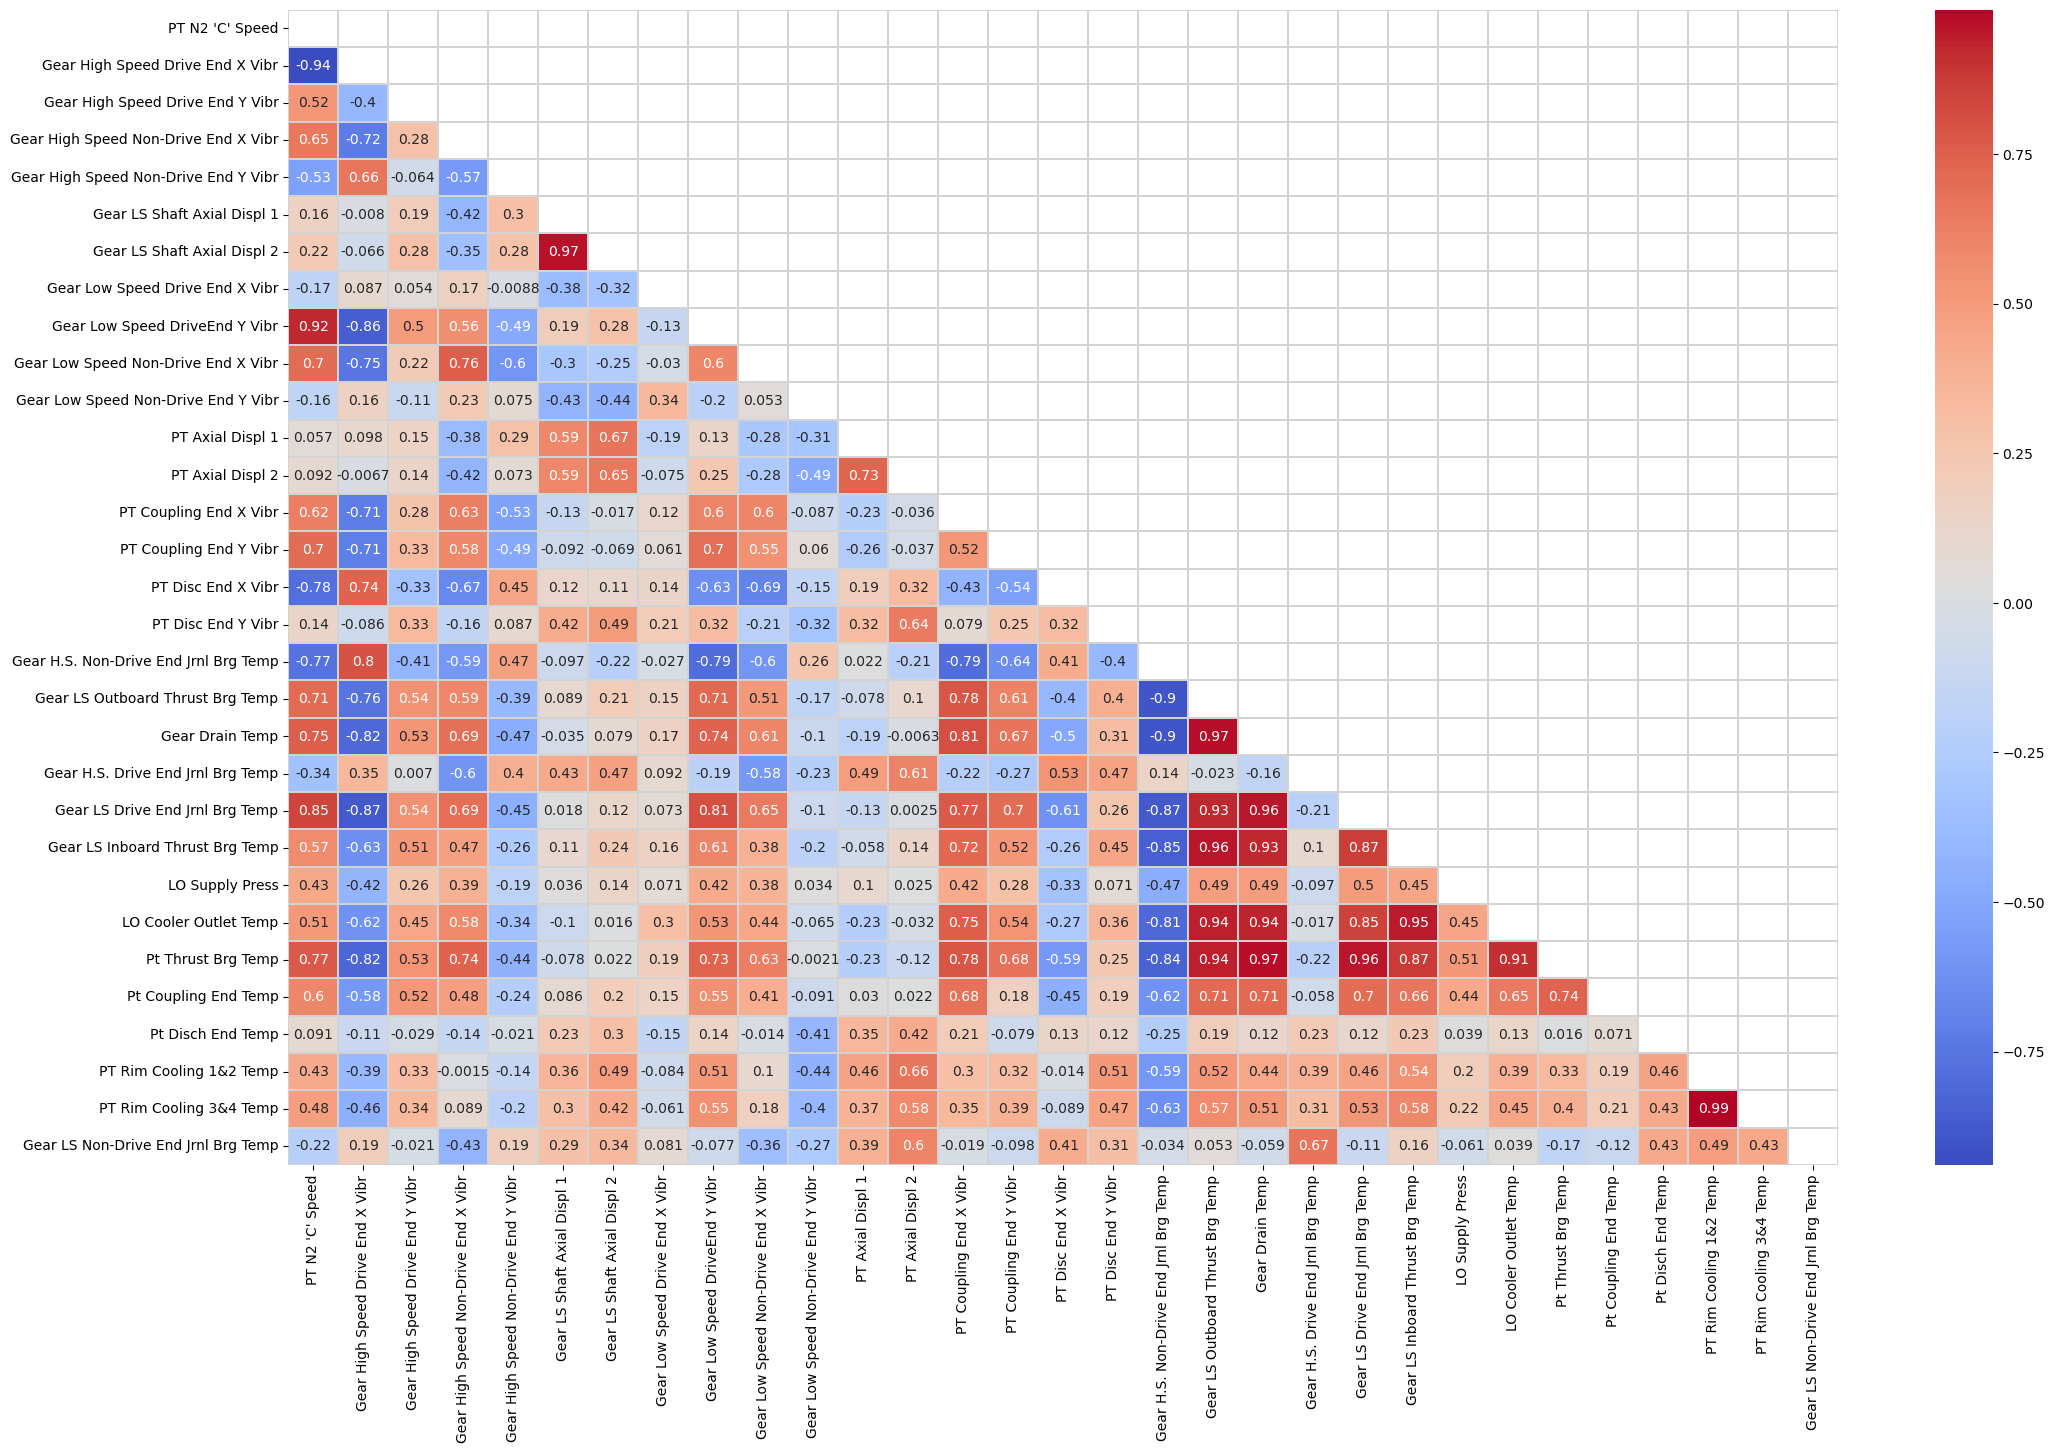

In [15]:
df_corr = data_selected.drop('Timestamp', axis=1).corr()
plt.figure(figsize=(25,15))
mask = np.triu(df_corr)
sns.heatmap(data=df_corr, cmap='coolwarm', annot=True, mask=mask, linecolor='lightgrey', linewidths=.1)